# Install/Import

In [ ]:
!pip install pyspark==3.0.1 py4j==0.10.9

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit
from pyspark.sql import functions as f
from pyspark.sql.types import *
from matplotlib import pyplot as plt

# Начало работы

## Инициализация сессии

In [ ]:
spark = SparkSession.builder\
        .master("local[*]")\
        .appName('Stock_Analys')\
        .getOrCreate()

## Работа с dataframe

In [ ]:
csv_file = '/content/drive/MyDrive/Analysis-projects/stocks_price_final.csv'
df = spark.read.csv(csv_file, sep=',',header=True)

In [ ]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [ ]:
data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

df = spark.read.csv(
    csv_file,
    sep=',',
    header=True,
    schema=final_struc
)

df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [ ]:
df.head(5)

[Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', data=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', data=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=4, symbol='TXG', data=datetime.date(2019, 9, 17), open=56.209999, high=60.900002, low=55.423, close=56.779999, volume=602800, adjusted=56.779999, market.cap='$9.31B', sector='Capit

In [ ]:
df.count()

1729034

In [ ]:
df.columns

['_c0',
 'symbol',
 'data',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market.cap',
 'sector',
 'industry',
 'exchange']

## Работа со столбцами

In [ ]:
df = df.withColumn('data', df.data)

df.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [ ]:
df = df.withColumnRenamed('_c0', 'index')

df.show(5)

+-----+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|index|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+-----+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|    1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|    2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|    3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|    4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|    5|   TXG|2019-09-18|56

In [ ]:
df = df.drop('index')

df.show(5)

+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|   TXG|2019-09-18|56.849998|    62.27|55.650002|     62.0|1589600|  

In [ ]:
# Удаление строк с пропущенными значениями
df.na.drop()

# Замена отсутствующих значений средним
df.na.fill(df.select(f.mean(df['open'])).collect()[0][0])

# Замена отсутствующих значений новыми
df.na.replace(old_value, new_vallue)

## Фильтрация данных

In [ ]:
df.select('sector').show(5)

+-------------+
|       sector|
+-------------+
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
+-------------+
only showing top 5 rows



In [ ]:
df.select(['open', 'close', 'adjusted']).show(5)

+---------+---------+---------+
|     open|    close| adjusted|
+---------+---------+---------+
|     54.0|    52.75|    52.75|
|    52.75|    52.27|    52.27|
|52.450001|55.200001|55.200001|
|56.209999|56.779999|56.779999|
|56.849998|     62.0|     62.0|
+---------+---------+---------+
only showing top 5 rows



In [ ]:
df.filter( (col('data') >= lit('2020-01-01')) & (col('data') <= lit('2020-01-31')) ).show(5)

+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
|symbol|      data|     open|     high|      low|    close|volume| adjusted|market.cap|       sector|            industry|exchange|
+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
|   TXG|2020-01-02|76.910004|77.989998|71.480003|72.830002|220200|72.830002|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|   TXG|2020-01-03|71.519997|76.188004|70.580002|75.559998|288300|75.559998|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|   TXG|2020-01-06|75.269997|77.349998|73.559998|75.550003|220600|75.550003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|   TXG|2020-01-07|     76.0|77.279999|    75.32|75.980003|182400|75.980003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|   TXG|2020-01-08|76.089996|76.949997|72.739998|74.839996|172100|74.839996|

In [ ]:
df.filter(df.adjusted.between(100.0, 500.0)).show()

+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
|symbol|      data|      open|      high|       low|     close|volume|  adjusted|market.cap|       sector|            industry|exchange|
+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
|   TXG|2020-01-24| 95.459999|     101.0| 94.157997|100.790001|328100|100.790001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|   TXG|2020-01-27| 99.760002|104.892998| 97.019997|103.209999|334900|103.209999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|   TXG|2020-01-28|104.620003|108.269997|103.297997|106.620003|245400|106.620003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  ABMD|2019-01-02|315.940002|320.709991|307.029999|309.959991|590000|309.959991|   $13.39B|  Health Care|Medical/Dental In...|  NASDAQ|
|  ABMD|2019-01-03|    307.25| 311.73999|

In [ ]:
df.select('open', 'close',
            f.when(df.adjusted >= 200.0, 1).otherwise(0)
).show(5)

+---------+---------+-----------------------------------------------+
|     open|    close|CASE WHEN (adjusted >= 200.0) THEN 1 ELSE 0 END|
+---------+---------+-----------------------------------------------+
|     54.0|    52.75|                                              0|
|    52.75|    52.27|                                              0|
|52.450001|55.200001|                                              0|
|56.209999|56.779999|                                              0|
|56.849998|     62.0|                                              0|
+---------+---------+-----------------------------------------------+
only showing top 5 rows



In [ ]:
df.select(
    'sector',
    df.sector.rlike('^[B,C]').alias('Колонка sector начинается с B или C')
).distinct().show()

+--------------------+-----------------------------------+
|              sector|Колонка sector начинается с B или C|
+--------------------+-----------------------------------+
|         Health Care|                              false|
|       Capital Goods|                               true|
|Consumer Non-Dura...|                               true|
|    Public Utilities|                              false|
|   Consumer Durables|                               true|
|             Finance|                              false|
|      Transportation|                              false|
|       Miscellaneous|                              false|
|   Consumer Services|                               true|
|              Energy|                              false|
|    Basic Industries|                               true|
|          Technology|                              false|
+--------------------+-----------------------------------+



## Группировка и агрегация

In [ ]:
df.select(['industry', 'open', 'close', 'adjusted'])\
    .groupBy('industry')\
    .mean()\
    .show()

+--------------------+------------------+------------------+------------------+
|            industry|         avg(open)|        avg(close)|     avg(adjusted)|
+--------------------+------------------+------------------+------------------+
|Finance/Investors...| 5.134401785714286| 5.136630739795919| 4.991354066964286|
|       Miscellaneous| 16.38588266938776| 16.35987909030613|16.148959322959183|
|Investment Banker...| 58.95058094575029|58.983085960826294|58.157837258903065|
|   Food Distributors|43.274508569354644| 43.27317810574859|42.910476083578644|
|Miscellaneous man...|15.660586409948984| 15.65093486096939|15.369818847193866|
|    Ophthalmic Goods|108.50137892138572|108.54045987608258|108.52516121052633|
|        Broadcasting|24.916787464825223| 24.91738845539514|24.699102029625255|
|Agricultural Chem...|22.046413928996614|22.042051076318053|21.635093418154767|
|Biotechnology: Bi...|24.808083192324542|24.803587149935442| 24.74507997827319|
|Other Specialty S...| 84.80718810562882

In [ ]:
df.filter((col('data') >= lit('2019-01-02')) & (col('data') <= lit('2020-01-31')))\
    .groupBy("sector") \
    .agg(f.min("data").alias("С"),
         f.max("data").alias("По"),

         f.min("open").alias("Минимум при открытии"),
         f.max("open").alias("Максимум при открытии"),
         f.avg("open").alias("Среднее в open"),

         f.min("close").alias("Минимум при закрытии"),
         f.max("close").alias("Максимум при закрытии"),
         f.avg("close").alias("Среднее в close"),

         f.min("adjusted").alias("Скорректированный минимум"),
         f.max("adjusted").alias("Скорректированный максимум"),
         f.avg("adjusted").alias("Среднее в adjusted"),

      ).show(truncate=False)

+---------------------+----------+----------+--------------------+---------------------+------------------+--------------------+---------------------+------------------+-------------------------+--------------------------+------------------+
|sector               |С         |По        |Минимум при открытии|Максимум при открытии|Среднее в open    |Минимум при закрытии|Максимум при закрытии|Среднее в close   |Скорректированный минимум|Скорректированный максимум|Среднее в adjusted|
+---------------------+----------+----------+--------------------+---------------------+------------------+--------------------+---------------------+------------------+-------------------------+--------------------------+------------------+
|Miscellaneous        |2019-01-02|2020-01-31|0.16                |690.0                |51.51619596530094 |0.16                |691.099976           |51.54953412269053 |0.16                     |691.099976                |51.21050733851903 |
|Health Care          |2019-01-0

# Визуализация

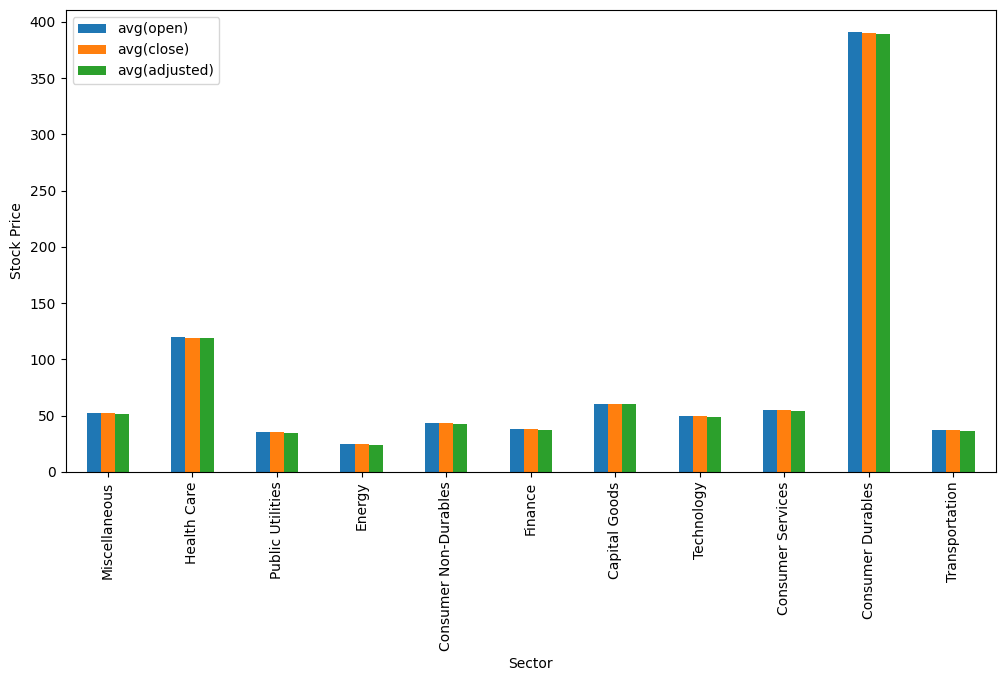

In [ ]:
sec_df =  df.select(['sector',
                       'open',
                       'close',
                       'adjusted']
                     )\
                     .groupBy('sector')\
                     .mean()\
                     .toPandas()

ind = list(range(12))
ind.pop(6)

sec_df.iloc[ind ,:].plot(kind='bar', x='sector', y=sec_df.columns.tolist()[1:],
                         figsize=(12, 6), ylabel='Stock Price', xlabel='Sector')
plt.show()

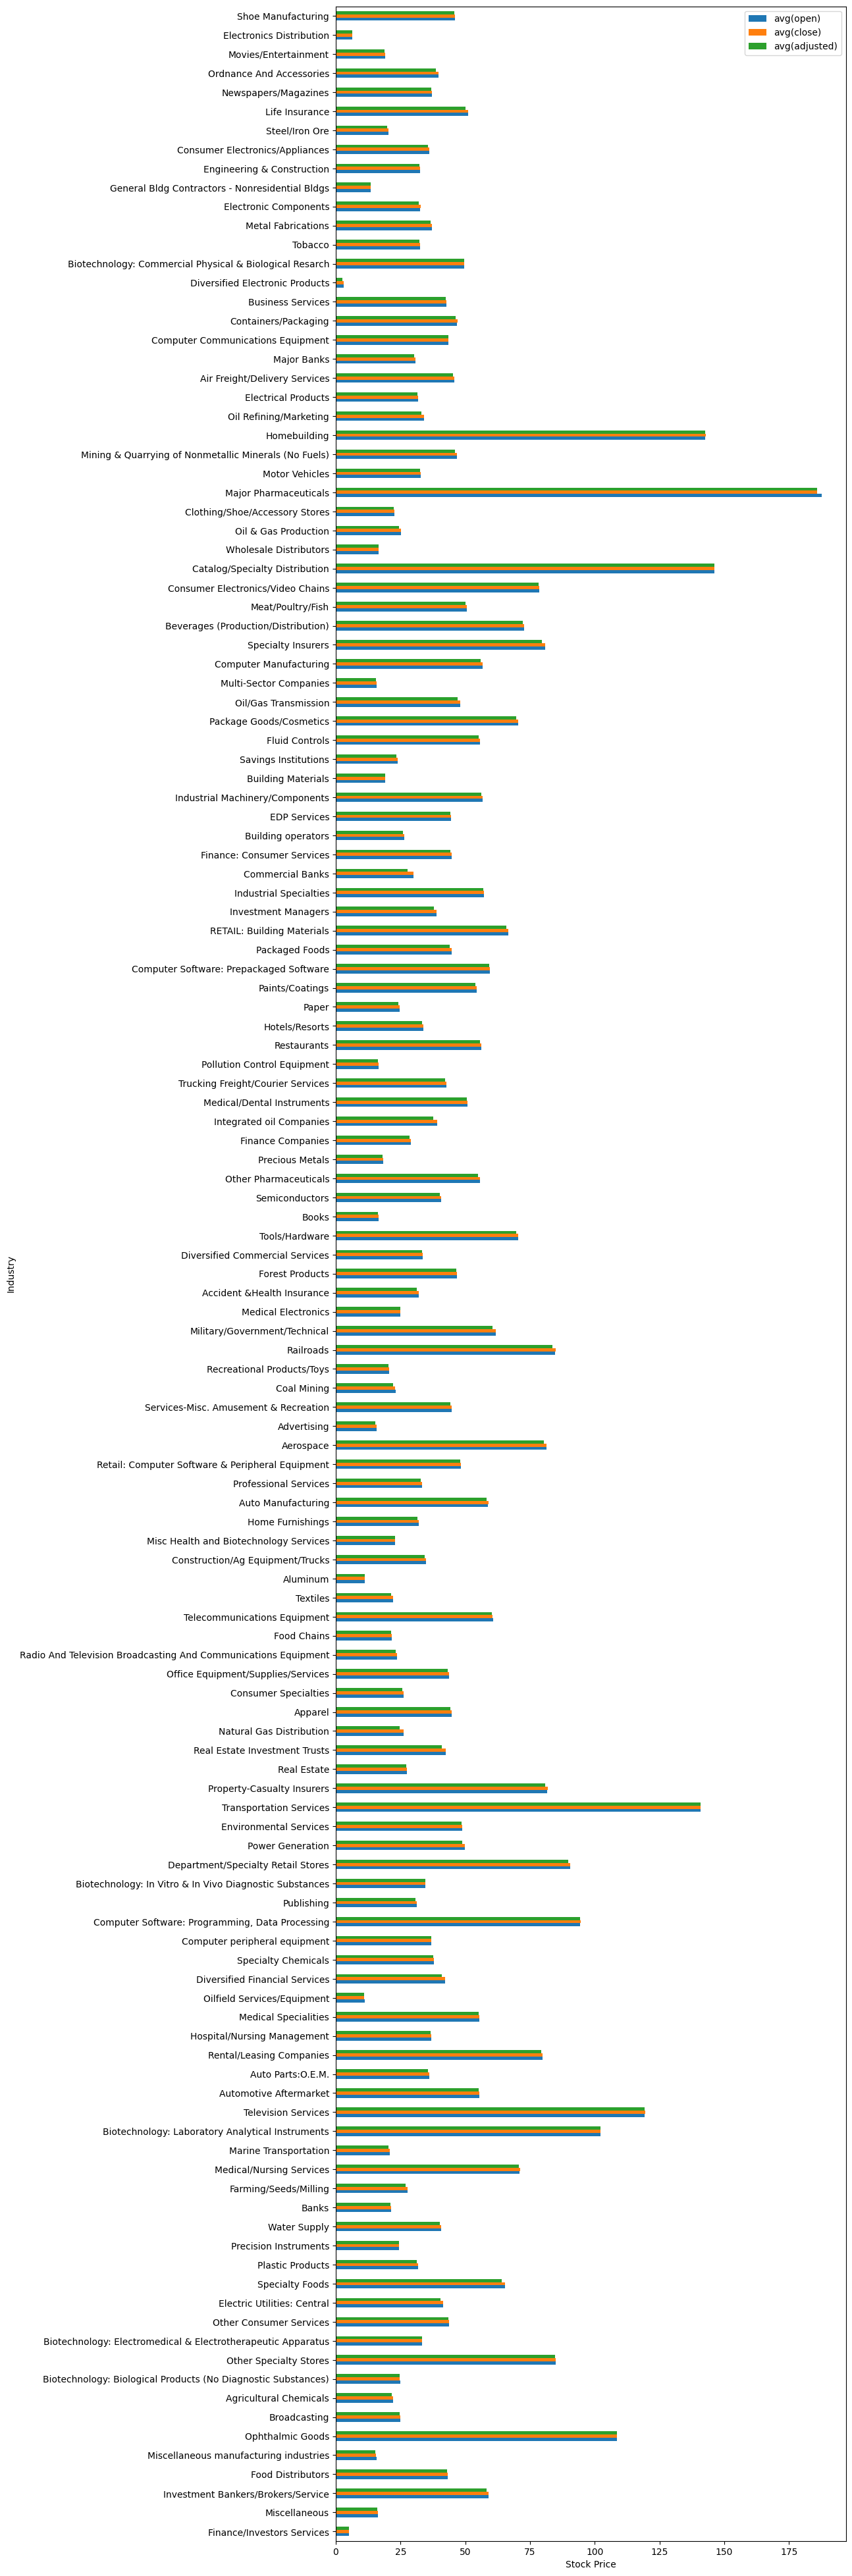

In [ ]:
industries_x = df.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()

q  = industries_x[(industries_x.industry != 'Major Chemicals') & (industries_x.industry != 'Building Products')]
q.plot(kind='barh', x='industry', y=q.columns.tolist()[1:], figsize=(10, 50), xlabel='Stock Price', ylabel='Industry')

plt.show()

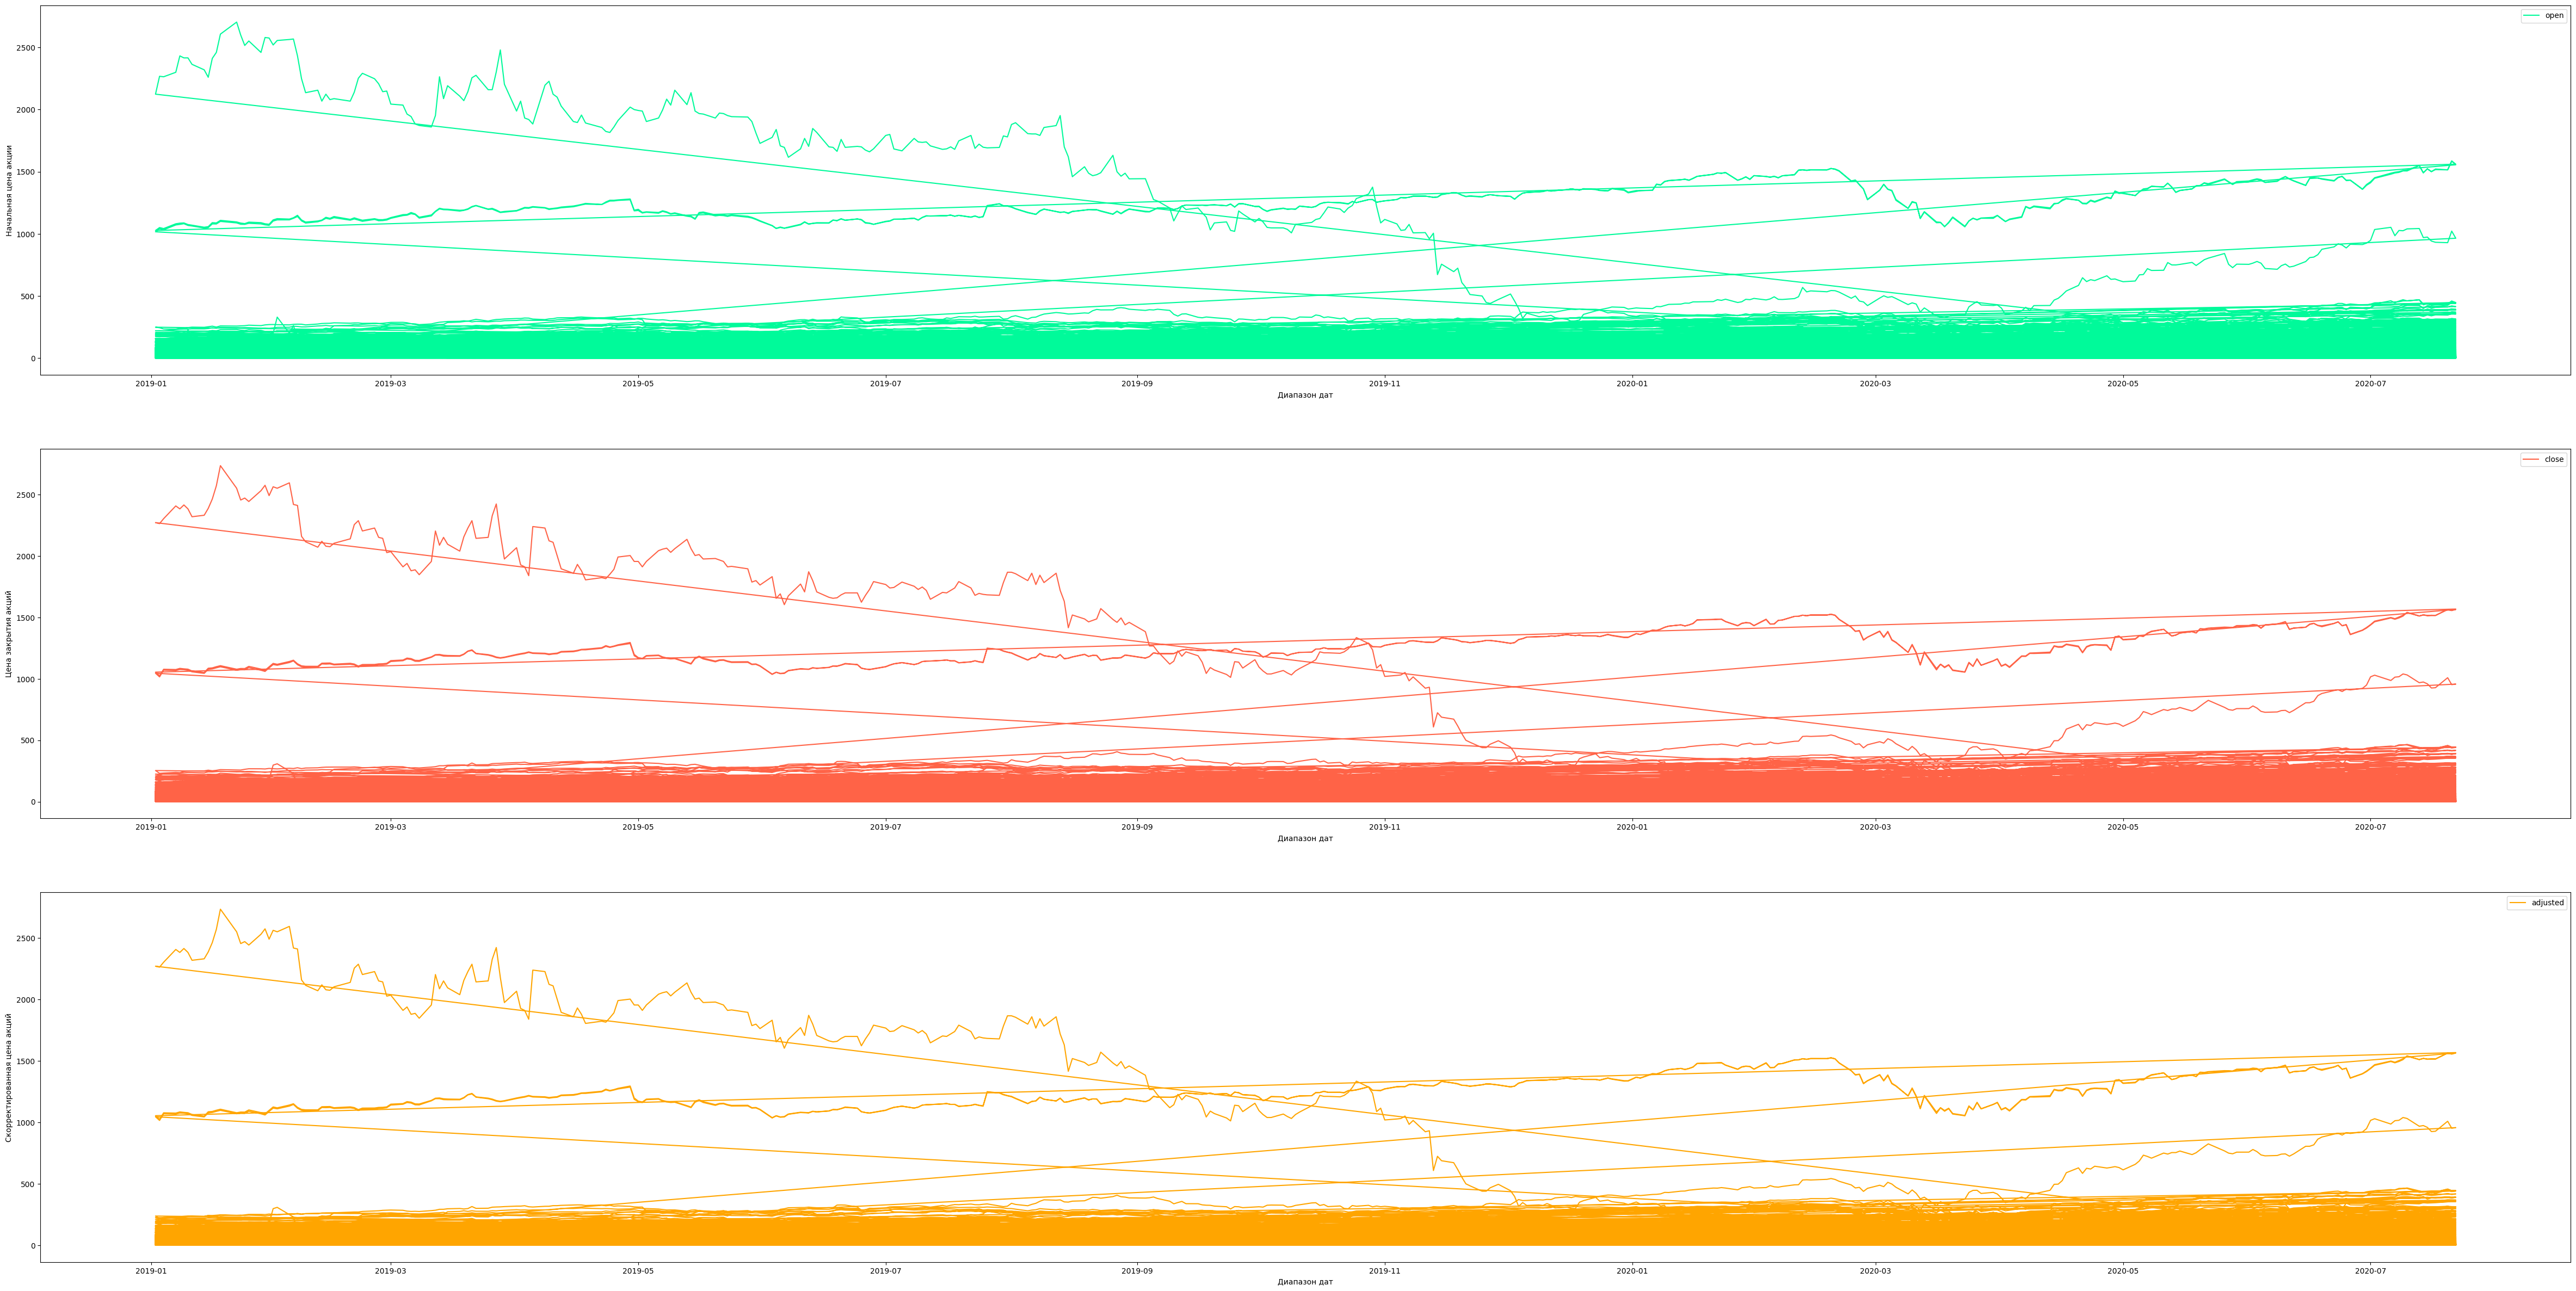

In [ ]:
tech = df.where(col('sector') == 'Technology')\
           .select('data', 'open', 'close', 'adjusted')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize =(60, 30))
tech.toPandas().plot(kind='line', x='data', y='open',
                     xlabel='Диапазон дат', ylabel='Начальная цена акции',
                     ax=axes[0], color='mediumspringgreen')
tech.toPandas().plot(kind='line', x='data', y='close',
                     xlabel='Диапазон дат', ylabel='Цена закрытия акций',
                     ax=axes[1], color='tomato')
tech.toPandas().plot(kind='line', x='data', y='adjusted',
                     xlabel='Диапазон дат', ylabel='Скорректированная цена акций',
                     ax=axes[2], color='orange')

plt.show()

# Сохранение

In [ ]:
# CSV
df.write.csv('dataset.csv')

# CSV
df.select(['data', 'open', 'close', 'adjusted'])\
    .write.csv('dataset.csv')

# JSON
df.write.save('dataset.json', format='json')

# Parquet
df.write.save('dataset.parquet', format='parquet')

# Завершение сессии

In [ ]:
spark.stop()